## Scrape women in politics data

http://cawp.rutgers.edu/state_fact_sheets/CT

In [1]:
import pandas as pd
import us
import requests
from bs4 import BeautifulSoup
import re

In [2]:
url = lambda st: "http://cawp.rutgers.edu/state_fact_sheets/" + st
url("CT")

'http://cawp.rutgers.edu/state_fact_sheets/CT'

In [3]:
def clean_val(val):
    return str(val).strip().strip("/")

In [4]:
table_cache = {}

In [5]:

def get_tables(st):
    
    global table_cache
    tables = pd.read_html(url(st))
    
    if st in table_cache:
        return table_cache[st]
    
    print "TO the INTERNET and beyond!"
        
    tables[2] = tables[2].reindex(tables[2].index.drop(0).drop(1))
    
#     tables[2].columns = ["year",
#                          "state_rank",
#                          "sen_d",
#                          "sen_r",
#                          "sen_tot_num",
#                          "sen_tot_den",
#                          "house_d",
#                          "house_r",
#                          "house_tot_num",
#                          "house_tot_den",
#                          "leg_tot_num",
#                          "leg_tot_den",
#                          "leg_women_pct"]
    
#     for c in tables[2].columns.tolist():
#         tables[2][c] = pd.to_numeric(tables[2][c].apply(lambda x: clean_val(x)),errors=coerce)
    
#     tables[2] = tables[2].set_index("year")

    table_cache[st] = tables
    return table_cache[st]

get_tables("CT")[2].head()

TO the INTERNET and beyond!


,0,1,2,3,4,5,6,7,8,9,10,11,12
2,2018,21,7,2,9/,36,21,21,42/,151.0,51/,187.0,27.3
3,2017,19,7,2,9/,36,21,22,43/,151.0,52/,187.0,27.8
4,2016,16,8,1,9/,36,24,19,43/,151.0,52/,187.0,27.8
5,2015,15,8,1,9/,36,25,19,44/,151.0,53/,187.0,28.3
6,2014,13,7,1,8/,36,29,18,47/,151.0,55/,187.0,29.4


In [6]:
get_tables("AL")[2].head()

TO the INTERNET and beyond!


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
2,2018,45,3,0,1,4/,35,12,5,17/,105.0,21/,140.0,15.0
3,2017,45,3,0,1,4/,35,12,5,17/,105.0,21/,140.0,15.0
4,2016,46,3,0,1,4/,35,11,5,16/,105.0,20/,140.0,14.3
5,2015,46,3,0,1,4/,35,11,5,16/,105.0,20/,140.0,14.3
6,2014,47,4,0,1,5/,35,9,6,15/,105.0,20/,140.0,14.3


In [7]:
def sheet3(st, cache=None):
    if cache is not None:
        ret = cache
    else:
        ret = get_tables(st)[2]
    ret = ret[[0,1,len(ret.columns) - 1]]
    ret.columns = ["year","state_rank","women_leg_pct"]
    ret["state"] = st
    ret = ret.set_index(["state","year"])
    
    return ret
    
sheet3("CT").head()

/Users/jakekara/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


state_rank  women_leg_pct
state year                          
CT    2018         21           27.3
      2017         19           27.8
      2016         16           27.8
      2015         15           28.3
      2014         13           29.4

In [8]:
def get_all_states():
    
    frames = []
    
    for st in [st.abbr for st in us.states.STATES]:
        print st
        try:
            frames.append(sheet3(st))
        except:
            pass
        
    return pd.concat(frames)
    
all_states = get_all_states()

AL


/Users/jakekara/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


AK
TO the INTERNET and beyond!
AZ
TO the INTERNET and beyond!
AR
TO the INTERNET and beyond!
CA
TO the INTERNET and beyond!
CO
TO the INTERNET and beyond!
CT
DE
TO the INTERNET and beyond!
DC
FL
TO the INTERNET and beyond!
GA
TO the INTERNET and beyond!
HI
TO the INTERNET and beyond!
ID
TO the INTERNET and beyond!
IL
TO the INTERNET and beyond!
IN
TO the INTERNET and beyond!
IA
TO the INTERNET and beyond!
KS
TO the INTERNET and beyond!
KY
TO the INTERNET and beyond!
LA
TO the INTERNET and beyond!
ME
TO the INTERNET and beyond!
MD
TO the INTERNET and beyond!
MA
TO the INTERNET and beyond!
MI
TO the INTERNET and beyond!
MN
TO the INTERNET and beyond!
MS
TO the INTERNET and beyond!
MO
TO the INTERNET and beyond!
MT
TO the INTERNET and beyond!
NE
TO the INTERNET and beyond!
NV
TO the INTERNET and beyond!
NH
TO the INTERNET and beyond!
NJ
TO the INTERNET and beyond!
NM
TO the INTERNET and beyond!
NY
TO the INTERNET and beyond!
NC
TO the INTERNET and beyond!
ND
TO the INTERNET and beyond!
OH

In [9]:
all_states.to_csv("output/all-states.csv")

/Users/jakekara/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


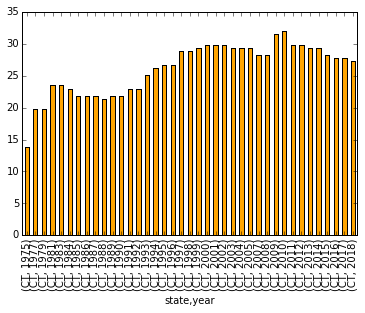

In [10]:
%matplotlib inline
sheet3("CT")["women_leg_pct"].sort_index().plot.bar(color="orange")

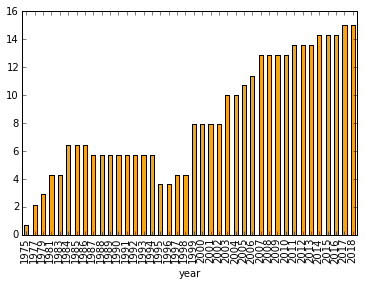

In [11]:
all_states.loc["AL"]["women_leg_pct"].sort_index().plot.bar(color="orange")

In [12]:
import matplotlib.pyplot as plt
def plot_st(st, col="women_leg_pct"):
    global all_states
    
    df = all_states.loc[st].dropna(how="any") #sheet3(st, cache=all_states.loc[st]).loc[st].copy()
    

    if len(df) < 30:
        print st, len(df)
    else:
        print st
    
    ax = df[col].sort_index().plot.bar(
        color="orange",
        width=1.0,
        edgecolor="none",
        ylim=(0,50))
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')
    
    fname = str(int(df.loc["2018"]["state_rank"])) + "-" + st + ".png"
    
    plt.savefig("img/" + fname)
    
    plt.clf()
    
        
plot_st("CT")

CT


In [13]:
def plot_all_states():
    for st in [st.abbr for st in us.states.STATES]:
        try:
            plot_st(st)
        except:
            pass
plot_all_states()


AL
AK
AZ
AR
CA
CO
CT
DE
FL
GA
HI
ID
IL
IN
IA
KS
KY
LA
ME
MD
MA 10
MI
MN
MS
MO
MT
NE
NV
NH
NJ
NM
NY
NC
ND
OH
OK
OR
PA
RI
SC
SD
TN
TX
UT
VT
VA
WA
WV
WI
WY


In [14]:
sheet3("MS")

/Users/jakekara/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


state_rank  women_leg_pct
state year                          
MS    2018         46           14.9
      2017         46           14.9
      2016         50           13.2
      2015         41           17.2
      2014         40           17.2
      2013         38           17.8
      2012         44           16.1
      2011         45           14.9
      2010         47           14.4
      2009         47           14.4
      2008         45           14.4
      2006         46           13.8
      2004         47           12.6
      2003         46           12.6
      2002         46           12.6
      2001         46           12.6
      2000         46           12.6
      1999         46           12.1
      1998         44           12.6
      1997         45           12.6
      1996         46           11.5
      1995         45           11.5
      1994         43           11.5
      1993         44           10.9
      1992         48            6.9
      1991         47            6.9
      1990         48            5.7
      1989         47            5.7
      1988         48            5.7
      1987         50            2.3
      1986         48            2.3
      1985         50            2.3
      1984         50            2.9
      1983         50            1.7
      1981         50            1.1
      1979         50            1.1
      1977         50            1.1
      1975         45            3.4

In [15]:
plot_st("MS")

MS


In [16]:
sheet3("MA")

/Users/jakekara/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


state_rank  women_leg_pct
state year                          
MA    2018         28           24.5
      2017         24           25.5
      2016         22           25.0
      2015         23           25.0
      2014         25           25.0
      2013         24           25.5
      2012         24           24.5
      2011         23           24.5
      2010         22           25.5
      2009         18           26.0

In [17]:
get_tables("MA")[2]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
2,2018,28,10,0,10/,40,30,8,1,39/,160.0,49/,200.0,24.5
3,2017,24,12,0,12/,40,30,8,1,39/,160.0,51/,200.0,25.5
4,2016,22,12,0,12/,40,29,9,-,38/,160.0,50/,200.0,25.0
5,2015,23,12,0,12/,40,29,9,-,38/,160.0,50/,200.0,25.0
6,2014,25,12,0,12/,40,31,7,-,38/,160.0,50/,200.0,25.0
7,2013,24,12,0,12/,40,32,7,-,39/,160.0,51/,200.0,25.5
8,2012,24,11,0,11/,40,32,6,-,38/,160.0,49/,200.0,24.5
9,2011,23,11,0,11/,40,32,6,-,38/,160.0,49/,200.0,24.5
10,2010,22,12,0,12/,40,36,3,-,39/,160.0,51/,200.0,25.5
11,2009,18,12,0,12/,40,37,3,-,40/,160.0,52/,200.0,26.0


In [18]:
pd.read_html(url("MA"))

[                                                   0             1  \
 0                               Elizabeth Warren (D)  U.S. Senator   
 1                               Katherine Clark (D)1     U.S. Rep.   
 2                                  Niki Tsongas (D)2     U.S. Rep.   
 3                            Margaret M. Heckler (R)     U.S. Rep.   
 4                               Louise Day Hicks (D)     U.S. Rep.   
 5                           Edith Nourse Rogers (R)3     U.S. Rep.   
 6  Clark won a special election to fill a vacancy...           NaN   
 
               2  
 0  2013-present  
 1  2013-present  
 2  2007-present  
 3     1967-1983  
 4     1971-1973  
 5     1925-1960  
 6           NaN  ,
                          0                    1             2
 0         Karyn Polito (R)  Lieutenant Governor  2015-present
 1     Deborah Goldberg (D)      State Treasurer  2015-present
 2         Maura Healey (D)     Attorney General  2015-present
 3         Suzanne Bump (

In [19]:
sheet3("CT")

/Users/jakekara/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


state_rank  women_leg_pct
state year                          
CT    2018         21           27.3
      2017         19           27.8
      2016         16           27.8
      2015         15           28.3
      2014         13           29.4
      2013         11           29.4
      2012          9           29.9
      2011          9           29.9
      2010          8           32.1
      2009          8           31.6
      2008         16           28.3
      2007         15           28.3
      2005         14           29.4
      2004          7           29.4
      2003          8           29.4
      2002          9           29.9
      2001          9           29.9
      2000          9           29.9
      1999          9           29.4
      1998         10           28.9
      1997         10           28.9
      1996         11           26.7
      1995         11           26.7
      1994         11           26.2
      1993         13           25.1
      1992         16           23.0
      1991         16           23.0
      1990         14           21.9
      1989         13           21.9
      1988          9           21.4
      1987          8           21.9
      1986          7           21.9
      1985          7           21.9
      1984          4           23.0
      1983          3           23.5
      1981          3           23.5
      1979          3           19.8
      1977          2           19.8
      1975          7           13.9

In [20]:
all_states.loc["MA"]

,state_rank,women_leg_pct
year,,
2018,28,24.5
2017,24,25.5
2016,22,25.0
2015,23,25.0
2014,25,25.0
2013,24,25.5
2012,24,24.5
2011,23,24.5
2010,22,25.5


In [21]:
sheet3("MA").loc["MA"].loc["2018"]

/Users/jakekara/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


state_rank         28
women_leg_pct    24.5
Name: 2018, dtype: object

In [22]:
def combine(year, col="women_leg_pct"):
    frames = []
    for st in us.states.STATES:
        try:
            df = sheet3(st.abbr).loc[str(st.abbr)].loc[str(year)].to_frame().reset_index()
        except Exception as e:
            print e
            continue
        df = df[df["index"] == col]
        df["state"] = st
        df["st"] = st.abbr
        frames.append(df.copy())
        print st
    return pd.concat(frames)
        


In [37]:
df2018 = combine(2018)


/Users/jakekara/Library/Python/2.7/lib/python/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Alabama
Alaska
Arizona
Arkansas
California
Colorado
Connecticut
Delaware
HTTP Error 404: Not Found
Florida
Georgia
Hawaii
Idaho
Illinois
Indiana
Iowa
Kansas
Kentucky
Louisiana
Maine
Maryland
Massachusetts
Michigan
Minnesota
Mississippi
Missouri
Montana
Nebraska
Nevada
New Hampshire
New Jersey
New Mexico
New York
North Carolina
North Dakota
Ohio
Oklahoma
Oregon
Pennsylvania
Rhode Island
South Carolina
South Dakota
u'the label [2018] is not in the [index]'
Texas
Utah
Vermont
Virginia
Washington
West Virginia
Wisconsin
Wyoming


In [39]:
df2018["2018"] = pd.to_numeric(df2018["2018"])

In [44]:
print(df2018[["state","2018"]].to_csv(sep="\t", float_format="%.1f", index=False))

state	2018
Alabama	15.0
Alaska	31.7
Arizona	40.0
Arkansas	18.5
California	24.2
Colorado	38.0
Connecticut	27.3
Delaware	21.0
Florida	26.3
Georgia	26.7
Hawaii	28.9
Idaho	30.5
Illinois	35.6
Indiana	20.0
Iowa	22.3
Kansas	28.5
Kentucky	16.7
Louisiana	14.6
Maine	33.9
Maryland	33.0
Massachusetts	24.5
Michigan	25.0
Minnesota	32.3
Mississippi	14.9
Missouri	23.4
Montana	28.0
Nebraska	26.5
Nevada	38.1
New Hampshire	28.8
New Jersey	30.8
New Mexico	30.4
New York	28.2
North Carolina	24.7
North Dakota	18.4
Ohio	22.0
Oklahoma	14.1
Oregon	33.3
Pennsylvania	19.4
Rhode Island	31.9
South Carolina	15.9
South Dakota	19.0
Texas	20.4
Utah	20.2
Vermont	40.0
Virginia	27.1
Washington	37.4
West Virginia	14.9
Wisconsin	24.2
Wyoming	11.1



In [45]:
df2018["2018"].min()

11.1